In [1]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd


In [2]:
# Loading clinical trial data in csv
clinic_data_df = pd.read_csv("Resources/clinicaltrial_data.csv")
clinic_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Loading mouse drug data in csv
mousedrug_data_df = pd.read_csv("Resources/mouse_drug_data.csv")
mousedrug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Merge our two data frames together
combined_data = pd.merge(clinic_data_df, mousedrug_data_df, on=["Mouse ID","Mouse ID"])
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
# Create a dataframe containing error value for the variable "Tumor Volume"
drugtumor_group_by = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
drugtumor_group_by_result = pd.DataFrame(drugtumor_group_by)
drugtumor_group_by_result.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Resetting the index and creating a pivot table to analyze the Tumor Volume
drugtumor_df = drugtumor_group_by.reset_index()
drugtumor_pivot = drugtumor_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
drugtumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
#Creating a pivot table conataining mean values for to analyse the Tumor Response to reatment
df_mean = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
drugtumor_df_mean = df_mean.reset_index()
drugtumor_df_mean = drugtumor_df_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
drugtumor_df_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


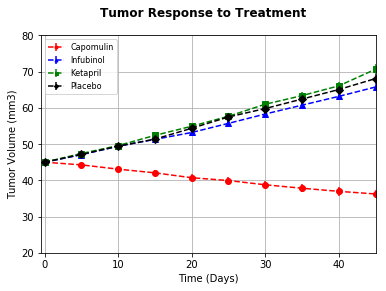

In [8]:
#Preparing the paramaters of the scatter plot
fig, ax = plt.subplots()

# adding a title to the scatter plot
fig.suptitle("Tumor Response to Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Capomulin"],yerr=drugtumor_pivot["Capomulin"], color='red',fmt="o",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Infubinol"],yerr=drugtumor_pivot["Infubinol"], color='blue',fmt="^",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Ketapril"],yerr=drugtumor_pivot["Ketapril"], color='green',fmt="s",linestyle ='dashed')
ax.errorbar(drugtumor_df_mean.index,drugtumor_df_mean["Placebo"],yerr=drugtumor_pivot["Placebo"], color='black', fmt="D",linestyle ='dashed' )

# x limits of the scatter plot
ax.set_xlim(-0.5, 45)

# y limits of the scatter plot
ax.set_ylim(20, 80)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# adding a legend to the scatter plot
ax.legend(
       scatterpoints=1,
       loc='best',
       ncol=1,
       markerscale=0.5,
       fontsize=8)

plt.grid(True)

# Prints the scatter plot to the screen
plt.show()



In [9]:
# Create a dataframe containing error value for the variable ""Metastatic Sites""
drugmetast_group_by = combined_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

drugmetast_group_by_result = pd.DataFrame(drugmetast_group_by)
drugmetast_group_by_result.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Resetting the index and creating a pivot table to analyze the Tumor Volume
drugmetast_df = drugmetast_group_by.reset_index()
drugmetast_pivot = drugmetast_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
drugmetast_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [11]:
#Creating a pivot table for to analyse the Metastatic Response to Treatment
drugmetast_mean = combined_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
drugmetast_df_mean = drugmetast_mean.reset_index()
drugmetast_df_mean = drugmetast_df_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]


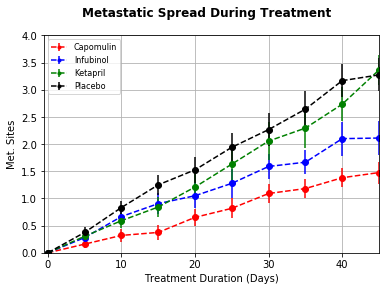

In [12]:
#Preparing the paramaters of the scatter plot
fig, ax = plt.subplots()

# adding a title to the scatter plot
fig.suptitle("Metastatic Spread During Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(drugmetast_df_mean.index,drugmetast_df_mean["Capomulin"],yerr=drugmetast_pivot["Capomulin"], color='red',fmt="o",linestyle ='dashed')
ax.errorbar(drugmetast_df_mean.index,drugmetast_df_mean["Infubinol"],yerr=drugmetast_pivot["Infubinol"], color='blue',fmt="o",linestyle ='dashed')
ax.errorbar(drugmetast_df_mean.index,drugmetast_df_mean["Ketapril"],yerr=drugmetast_pivot["Ketapril"], color='green',fmt="o",linestyle ='dashed')
ax.errorbar(drugmetast_df_mean.index,drugmetast_df_mean["Placebo"],yerr=drugmetast_pivot["Placebo"], color='black',fmt="o",linestyle ='dashed')

# x limits of the scatter plot
ax.set_xlim(-0.5, 45)

#y limits of the scatter plot
ax.set_ylim(0.0, 4.0)

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# adding a legend to the scatter
ax.legend(
       scatterpoints=1,
       loc='best',
       ncol=1,
       markerscale=0.5,
       fontsize=8)

# adding a grid to the plot
plt.grid(True)


# Prints the scatter plot to the screen
plt.show()


In [13]:
#Creating a dataframe containing the number survival at each point of the treatment for each Drug
survival_group_by = combined_data.groupby(["Drug", "Timepoint"])['Mouse ID'].count()
survival_group_by_result = pd.DataFrame(survival_group_by)
survival_group_by_result.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Creating the pivot table to analyze the percentage of survival mice for each drug
survival_df = survival_group_by.reset_index()
survival_pivot = survival_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
survival_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
#Calculating the pecent of survival mice for each Drug
        
survival_pivot_percent = survival_pivot.div(survival_pivot.iloc[0])*100
survival_pivot_percent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


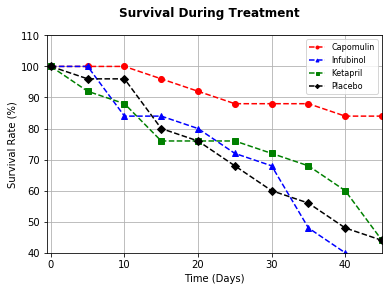

In [16]:
# Preparaing the paramaters of tha scatter plot
fig, ax = plt.subplots()

# Adding a title to the scatter plot
fig.suptitle("Survival During Treatment",
             fontsize=12, fontweight="bold")

ax.errorbar(survival_pivot_percent.index,survival_pivot_percent["Capomulin"], color='red',fmt="o",linestyle ='dashed')
ax.errorbar(survival_pivot_percent.index,survival_pivot_percent["Infubinol"], color='blue',fmt="^",linestyle ='dashed')
ax.errorbar(survival_pivot_percent.index,survival_pivot_percent["Ketapril"], color='green',fmt="s",linestyle ='dashed')
ax.errorbar(survival_pivot_percent.index,survival_pivot_percent["Placebo"], color='black',fmt="D",linestyle ='dashed')

#Setting the limits of the x and y axis
ax.set_xlim(-0.5, 45)
ax.set_ylim(40, 110)

#Adding a label to the x axis an the y axis
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

#Adding a legend to the scatter plot
ax.legend(
       scatterpoints=1,
       loc='best',
       ncol=1,
       markerscale=0.5,
       fontsize=8)

# adding a grid to the plot
plt.grid(True)

# Prints the scatter plot to the screen
plt.show()


In [17]:
#Creating a dataframe containing the number mice at each point of the treatment for each Drug
drugtumor_change = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
drugtumor_change_mean = pd.DataFrame(drugtumor_change)
drugtumor_change_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [18]:
#Creating a pivot table to analyze the percentage of survival mice for each drug
drugtumor_change_mean = drugtumor_change_mean.reset_index()
drugtumor_change_mean_pivot = drugtumor_change_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
drugtumor_change_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [19]:
# Calculating the percantage of tumor volume change for each drug
tumorchange_percent = ((drugtumor_change_mean_pivot.iloc[9] - drugtumor_change_mean_pivot.iloc[0])/ drugtumor_change_mean_pivot.iloc[0])*100
tumorchange_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

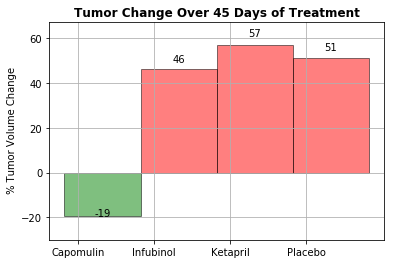

In [25]:
# Preparing the parameters of the bar chart

#Setting the values of the y axis
pct_chgt = [tumorchange_percent['Capomulin'],tumorchange_percent['Infubinol'],
            tumorchange_percent['Ketapril'],tumorchange_percent['Placebo']]

#setting the value oy the x axis
x_axis = np.arange(len(pct_chgt))
#width = 0.35

my_colors = ['green', 'red', 'red', 'red']

fig, ax = plt.subplots()


# Plot
rect = ax.bar(x_axis, pct_chgt, color=my_colors, alpha=0.5, align="edge",edgecolor = 'black',width =1)


#ax.set_xtick_locations = [value+0.4 for value in x_axis]
ax.set_xticks(x_axis + width / 2)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))

# Defining the limits of the y axis
ax.set_ylim(-30, max(pct_chgt)+10)

#Adding a title to the bar chart
ax.set_title("Tumor Change Over 45 Days of Treatment", fontsize=12, fontweight="bold")

#Adding a label to the y axis
ax.set_ylabel(" % Tumor Volume Change")

def autolabel(rects):
 #   """
#    Attach a text label above each bar displaying its height
 #   """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rect)

plt.grid(True)

# Prints the bar chart to the screen
plt.show()